# 명량 VS 7번방의 선물

## 필요 패키지

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import date

## 생각나는 할일

- 최근 10년간의 1~20위정도 영화에 대해서 각각의 초기 스크린수 데이터 찾아보기

## 데이터 파일 불러오기

In [2]:
# 명량 
mr = pd.read_excel("./boxofficeFiles/top11_screen/명량.xls")
mr.columns = mr.loc[2,:]
mr.drop([0,1,2], inplace=True)
mr.columns.name = ""
mr.reset_index(drop=True, inplace=True)
for i in range(len(mr)):
    mr.loc[i,"날짜"] = mr.loc[i,"날짜"].date()
mr

,날짜,스크린수,스크린점유율,상영횟수,상영점유율,좌석수,좌석점유율,좌석판매율,매출액,매출액증감(전일대비),관객수,관객수증감(전일대비),누적매출액,누적관객수,순위
0,2014-07-20,1,0,1,0,238,0,1,1428000,1428000 ( 100.0% ),238,238 ( 100.0% ),1428000,238,34
1,2014-07-21,18,0.005,28,0.002,7241,0.003,0.741,44016000,42588000 ( 2982.4% ),5369,5131 ( 2155.9% ),45444000,5607,7
2,2014-07-22,37,0.01,38,0.003,5600,0.003,0.099,4416000,-39600000 ( -90.0% ),552,-4817 ( -89.7% ),49860000,6159,22
3,2014-07-23,4,0.001,4,0,837,0,1,6696000,2280000 ( 51.6% ),837,285 ( 51.6% ),56556000,6996,9
4,2014-07-24,8,0.002,10,0.001,1741,0.001,1.086,14979000,8283000 ( 123.7% ),1890,1053 ( 125.8% ),71535000,8886,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2020-06-12,1,0,1,0,413,0,0,0,0 ( 0.0% ),0,0 ( 0.0% ),135757418810,17615686,128
166,2022-07-04,1,0,1,0,35,0,1,175000,175000 ( 100.0% ),35,35 ( 100.0% ),135757593810,17615721,48
167,2022-07-05,1,0,1,0,62,0,0.726,225000,50000 ( 28.6% ),45,10 ( 28.6% ),135757818810,17615766,49
168,2022-07-06,1,0,1,0,62,0,0.565,175000,-50000 ( -22.2% ),35,-10 ( -22.2% ),135757993810,17615801,48


In [3]:
# 7번방의 선물
m7 = pd.read_excel("./boxofficeFiles/top11_screen/7번방의선물.xls")
m7.columns = m7.loc[2,:]
m7.drop([0,1,2], inplace=True)
m7.columns.name = ""
m7.reset_index(drop=True, inplace=True)
for i in range(len(m7)):
    m7.loc[i,"날짜"] = m7.loc[i,"날짜"].date()
m7

,날짜,스크린수,스크린점유율,상영횟수,상영점유율,좌석수,좌석점유율,좌석판매율,매출액,매출액증감(전일대비),관객수,관객수증감(전일대비),누적매출액,누적관객수,순위
0,2013-01-13,1,0,1,0,280,0,1.007,1410000,1410000 ( 100.0% ),282,282 ( 100.0% ),1410000,282,27
1,2013-01-14,6,0.002,6,0,2006,0.001,0.987,15210000,13800000 ( 978.7% ),1980,1698 ( 602.1% ),16620000,2262,12
2,2013-01-16,3,0.001,3,0,834,0,1.014,6768000,6768000 ( 100.0% ),846,846 ( 100.0% ),23388000,3108,18
3,2013-01-17,1,0,1,0,144,0,1,1008000,-5760000 ( -85.1% ),144,-702 ( -83.0% ),24396000,3252,31
4,2013-01-18,21,0.006,21,0.002,5454,0.002,0.998,48510000,47502000 ( 4712.5% ),5443,5299 ( 3679.9% ),72906000,8695,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2020-05-23,25,0.005,27,0.003,3227,0.002,0.027,522000,218000 ( 71.7% ),87,35 ( 67.3% ),91435964170,12811909,38
146,2020-05-24,34,0.006,39,0.005,4531,0.003,0.029,791000,269000 ( 51.5% ),130,43 ( 49.4% ),91436755170,12812039,31
147,2020-05-25,21,0.005,21,0.003,2652,0.003,0.018,291000,-500000 ( -63.2% ),49,-81 ( -62.3% ),91437046170,12812088,38
148,2020-05-26,22,0.005,23,0.004,2842,0.003,0.016,270000,-21000 ( -7.2% ),46,-3 ( -6.1% ),91437316170,12812134,41


## 데이터 전처리

In [4]:
mr.describe()

,날짜,스크린수,스크린점유율,상영횟수,상영점유율,좌석수,좌석점유율,좌석판매율,매출액,매출액증감(전일대비),관객수,관객수증감(전일대비),누적매출액,누적관객수,순위
count,170,170,170.0,170,170.0,170,170.0,170.0,170,170,170,170,170,170,170
unique,170,76,58.0,86,51.0,139,53.0,133.0,155,160,143,152,166,166,70
top,2014-07-20,1,0.0,1,0.0,1144,0.0,1.0,18000,0 ( 0.0% ),1,1 ( 100.0% ),135751393910,17614679,1
freq,1,57,62.0,43,85.0,7,82.0,8.0,4,7,8,8,3,3,23


In [5]:
mr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   날짜           170 non-null    object
 1   스크린수         170 non-null    object
 2   스크린점유율       170 non-null    object
 3   상영횟수         170 non-null    object
 4   상영점유율        170 non-null    object
 5   좌석수          170 non-null    object
 6   좌석점유율        170 non-null    object
 7   좌석판매율        170 non-null    object
 8   매출액          170 non-null    object
 9   매출액증감(전일대비)  170 non-null    object
 10  관객수          170 non-null    object
 11  관객수증감(전일대비)  170 non-null    object
 12  누적매출액        170 non-null    object
 13  누적관객수        170 non-null    object
 14  순위           170 non-null    object
dtypes: object(15)
memory usage: 20.0+ KB


In [6]:
m7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   날짜           150 non-null    object
 1   스크린수         150 non-null    object
 2   스크린점유율       150 non-null    object
 3   상영횟수         150 non-null    object
 4   상영점유율        150 non-null    object
 5   좌석수          150 non-null    object
 6   좌석점유율        150 non-null    object
 7   좌석판매율        150 non-null    object
 8   매출액          150 non-null    object
 9   매출액증감(전일대비)  150 non-null    object
 10  관객수          150 non-null    object
 11  관객수증감(전일대비)  150 non-null    object
 12  누적매출액        150 non-null    object
 13  누적관객수        150 non-null    object
 14  순위           150 non-null    object
dtypes: object(15)
memory usage: 17.7+ KB


- null값도 없고 일단 컬럼도 제거할 것이 보이지 않음

- % 형태의 데이터를 숫자형태로 변경하기
- 전일대비 비율을 파생컬럼으로 분리하기
- 개봉년도 다음년도 이후의 데이터는 재개봉으로 판단, 제외

#### 날짜 제외하기

In [7]:
overindex= []
for i in range(len(mr)):
    if (int(mr.loc[i, "날짜"].year) <= 2015):
        overindex.append(i)
mr = mr.loc[overindex,:]

In [8]:
mr.loc[mr["스크린수"] <= 100, "관객수"].sum()

32995

In [9]:
overindex= []
for i in range(len(m7)):
    if (int(m7.loc[i, "날짜"].year) <= 2014):
        overindex.append(i)
m7 = m7.loc[overindex,:]

In [10]:
m7.loc[m7["스크린수"] <= 100, "관객수"].sum()

44264

#### 스크린수가 100개 미만인 경우를 제외하기

- 스크린수가 100개 미만인 경우의 관객수의 합은 명량이 33800, 7번방의 선물이 44264이므로 제외가능함

In [11]:
mr = mr.loc[mr["스크린수"] > 100, :]
m7 = m7.loc[m7["스크린수"] > 100, :]

In [12]:
mr.reset_index(drop=True, inplace=True)
m7.reset_index(drop=True, inplace=True)

#### 점유율 100퍼센트 기준으로 변경하기

In [13]:
for col in ["스크린점유율", "상영점유율", "좌석점유율", "좌석판매율"]:
    mr.loc[:, col] = 100 * mr.loc[:, col]

for col in ["스크린점유율", "상영점유율", "좌석점유율", "좌석판매율"]:
    m7.loc[:, col] = 100 * m7.loc[:, col]

In [14]:
mr

,날짜,스크린수,스크린점유율,상영횟수,상영점유율,좌석수,좌석점유율,좌석판매율,매출액,매출액증감(전일대비),관객수,관객수증감(전일대비),누적매출액,누적관객수,순위
0,2014-07-30,1159,33.6,6147,42.3,1152173,48.4,59.3,4708879000,4649246000 ( 7796.4% ),682701,674628 ( 8356.6% ),4881110000,705201,1
1,2014-07-31,1202,31.8,6258,42.1,1176034,48.3,60.0,5243409900,534530900 ( 11.4% ),705070,22369 ( 3.3% ),10124519900,1410271,1
2,2014-08-01,1300,33.7,6699,44.4,1255037,50.9,69.1,6918410307,1675000407 ( 31.9% ),867437,162367 ( 23.0% ),17042930207,2277708,1
3,2014-08-02,1494,37.6,7605,49.1,1402659,55.3,87.9,9826541209,2908130902 ( 42.0% ),1232529,365092 ( 42.1% ),26869471416,3510237,1
4,2014-08-03,1587,39.8,7963,52.1,1456645,58.2,86.3,10031212500,204671291 ( 2.1% ),1257380,24851 ( 2.0% ),36900683916,4767617,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2014-09-27,110,2.3,218,1.4,26383,1.0,17.7,37704900,20115500 ( 114.4% ),4676,2420 ( 107.3% ),135599116610,17592610,14
60,2014-09-28,108,2.3,213,1.4,25973,1.1,20.4,42873600,5168700 ( 13.7% ),5304,628 ( 13.4% ),135641990210,17597914,11
61,2014-09-29,112,2.6,206,1.5,25616,1.1,9.0,16794400,-26079200 ( -60.8% ),2312,-2992 ( -56.4% ),135658784610,17600226,14
62,2014-09-30,107,2.5,204,1.5,25397,1.1,8.3,15225700,-1568700 ( -9.3% ),2102,-210 ( -9.1% ),135674010310,17602328,13


#### 관객수, 매출액 증감 새로운 파생컬럼으로 나누기

In [15]:
mr["매출액증감(전일대비)비율"] = 0
for col in ["매출액증감(전일대비)", "관객수증감(전일대비)"]:
    for i in range(len(mr)):
        if col == "매출액증감(전일대비)":
            ncol = "매출액증감(전일대비)비율"
        else:
            ncol = "관객수증감(전일대비)비율"
        mr.loc[i,ncol] = float(mr.loc[i,col].split()[2][:-1])
        mr.loc[i,col] = int(mr.loc[i,col].split()[0])

In [16]:
m7["매출액증감(전일대비)비율"] = 0
for col in ["매출액증감(전일대비)", "관객수증감(전일대비)"]:
    for i in range(len(m7)):
        if col == "매출액증감(전일대비)":
            ncol = "매출액증감(전일대비)비율"
        else:
            ncol = "관객수증감(전일대비)비율"
        m7.loc[i,ncol] = float(m7.loc[i,col].split()[2][:-1])
        m7.loc[i,col] = int(m7.loc[i,col].split()[0])

## EDA

In [17]:
def lineplotting(column, df1=mr, df2=m7):
    plt.rcParams['font.family'] = 'Malgun Gothic'
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(1,1,1)

    # sns.scatterplot(mr.index,mr[column], ax=ax1)
    sns.lineplot(df1.index, df1[column], ax = ax1, markers=".")

    # sns.scatterplot(m7.index,m7[column], ax=ax1)
    sns.lineplot(df2.index, df2[column], ax = ax1, markers=True)

    plt.legend(["명량", "7번방의 선물"])
    plt.show()

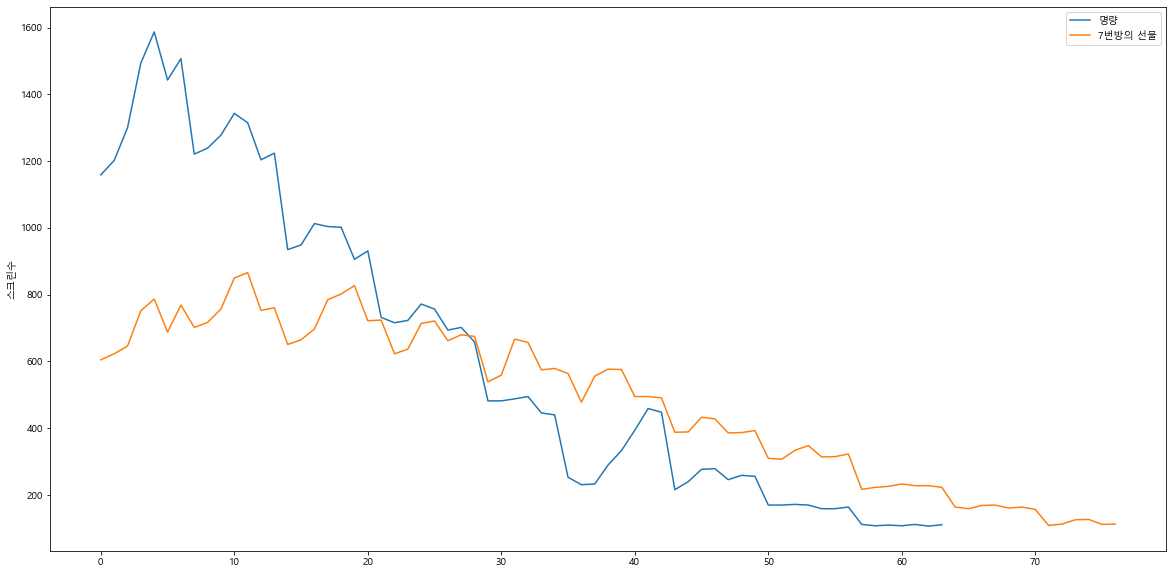

In [18]:
lineplotting("스크린수")

- 비교군으로써 다른 흥행 영화들의 스크린수점유율 대비 누적관객수를 확인해봐야 할듯


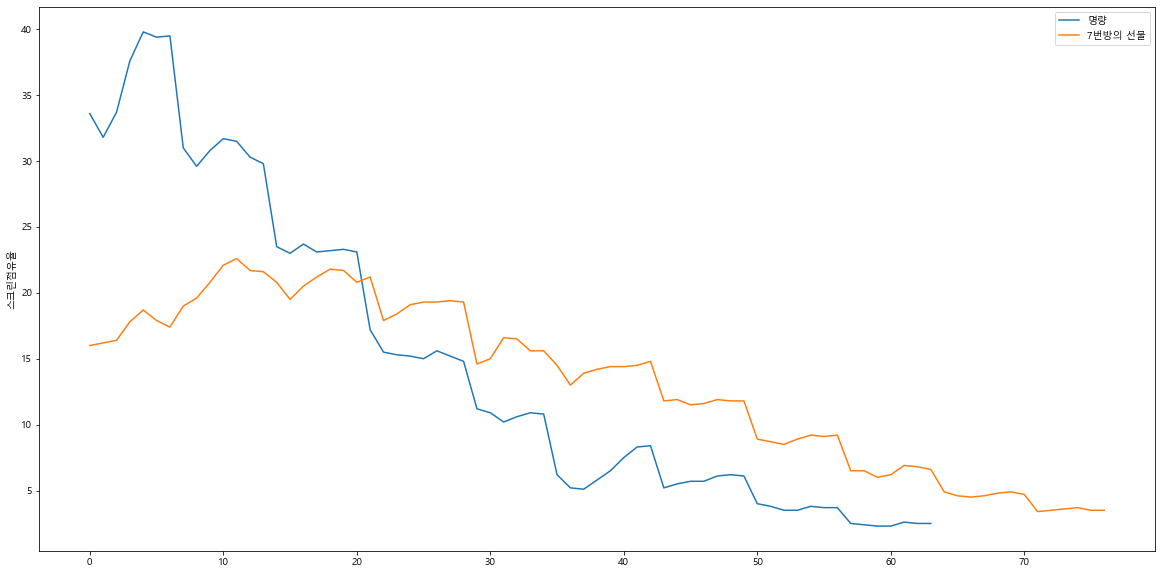

In [19]:
lineplotting("스크린점유율")

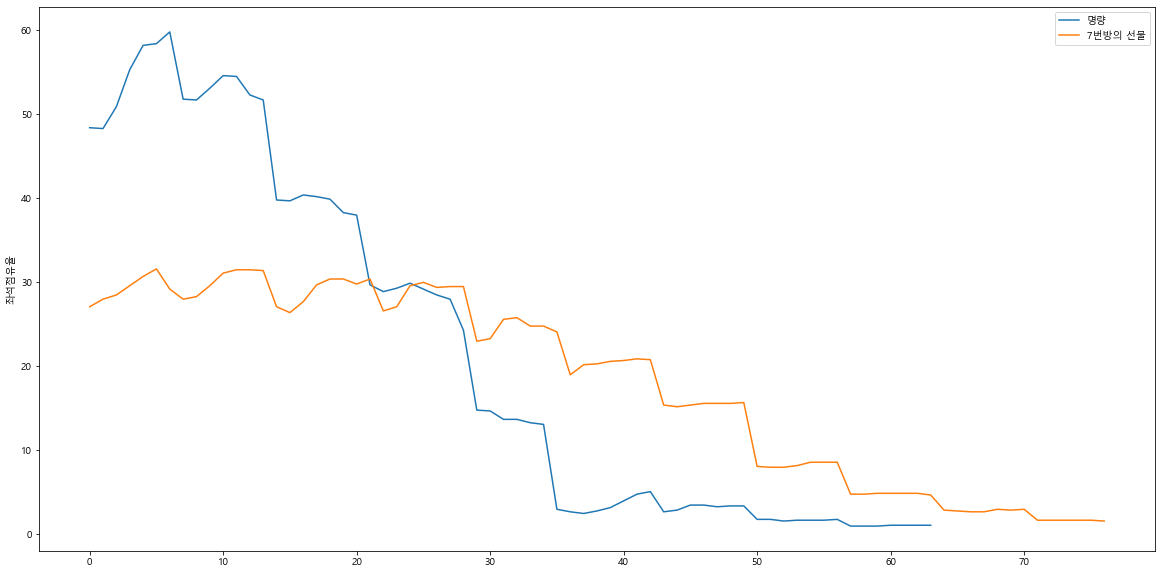

In [20]:
lineplotting("좌석점유율")

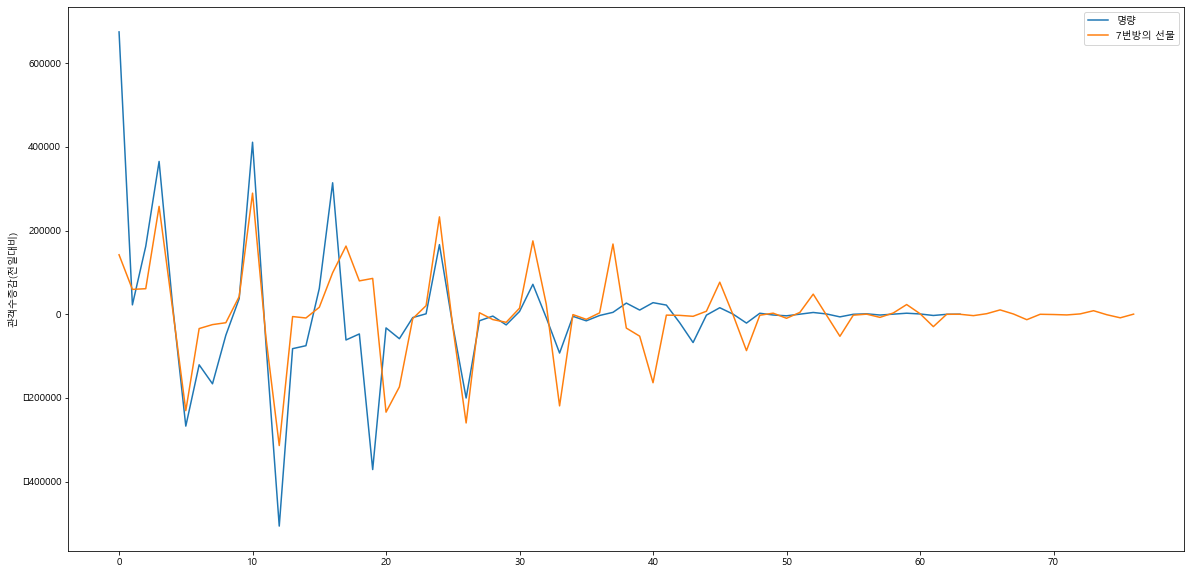

In [21]:
lineplotting("관객수증감(전일대비)")

In [22]:
# 스크린수 대비 관객수 컬럼 생성
mr["스크린수대비관객수"] = 0
m7["스크린수대비관객수"] = 0

mr.loc[:,"스크린수대비관객수"] = mr.loc[:,"관객수"] / mr.loc[:,"스크린수"]
m7.loc[:,"스크린수대비관객수"] = m7.loc[:,"관객수"] / m7.loc[:,"스크린수"]

# 좌석수 대비 관객수
mr["좌석수대비관객수"] = 0
m7["좌석수대비관객수"] = 0

mr.loc[:,"좌석수대비관객수"] = mr.loc[:,"관객수"] / mr.loc[:,"좌석수"]
m7.loc[:,"좌석수대비관객수"] = m7.loc[:,"관객수"] / m7.loc[:,"좌석수"]

# 스크린점유율 대비 관객수 컬럼 생성
mr["스크린점유율대비관객수"] = 0
m7["스크린점유율대비관객수"] = 0

mr.loc[:,"스크린점유율대비관객수"] = mr.loc[:,"관객수"] / mr.loc[:,"스크린점유율"]
m7.loc[:,"스크린점유율대비관객수"] = m7.loc[:,"관객수"] / m7.loc[:,"스크린점유율"]

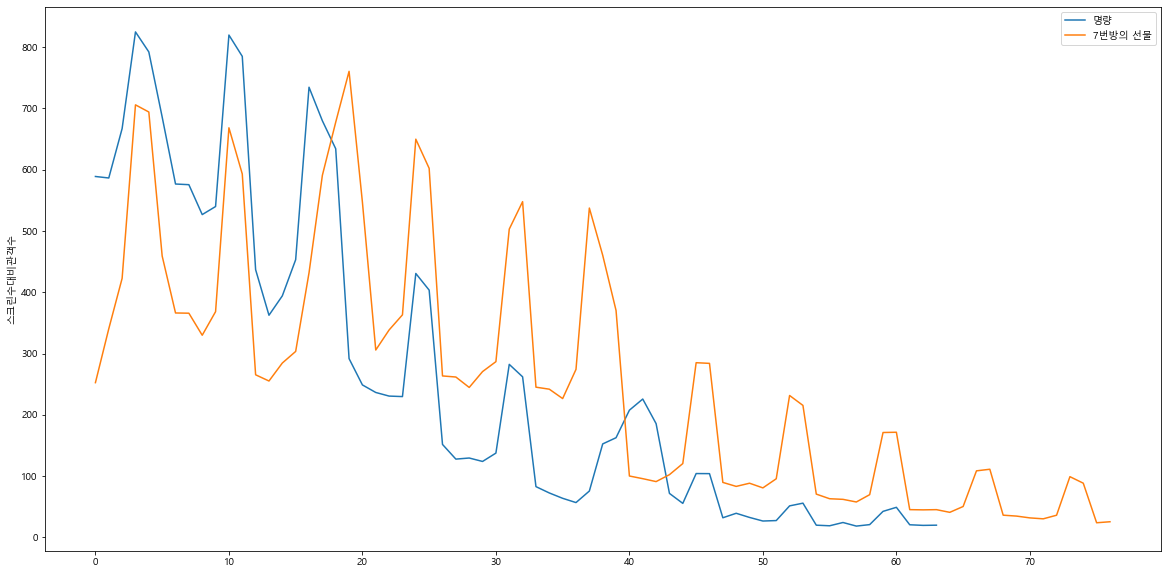

In [23]:
lineplotting("스크린수대비관객수")

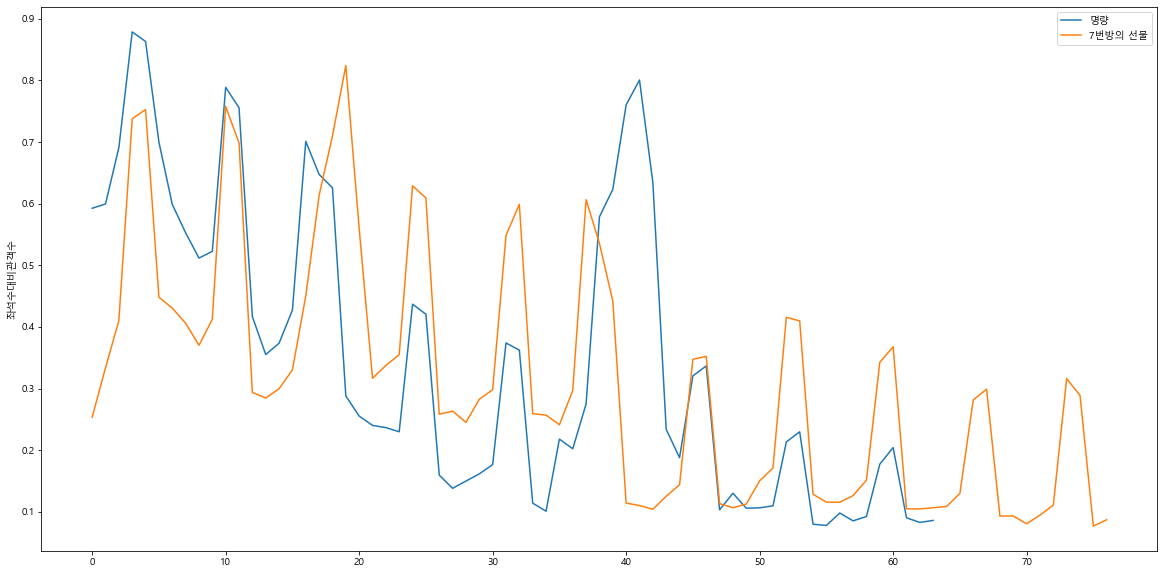

In [24]:
lineplotting("좌석수대비관객수")

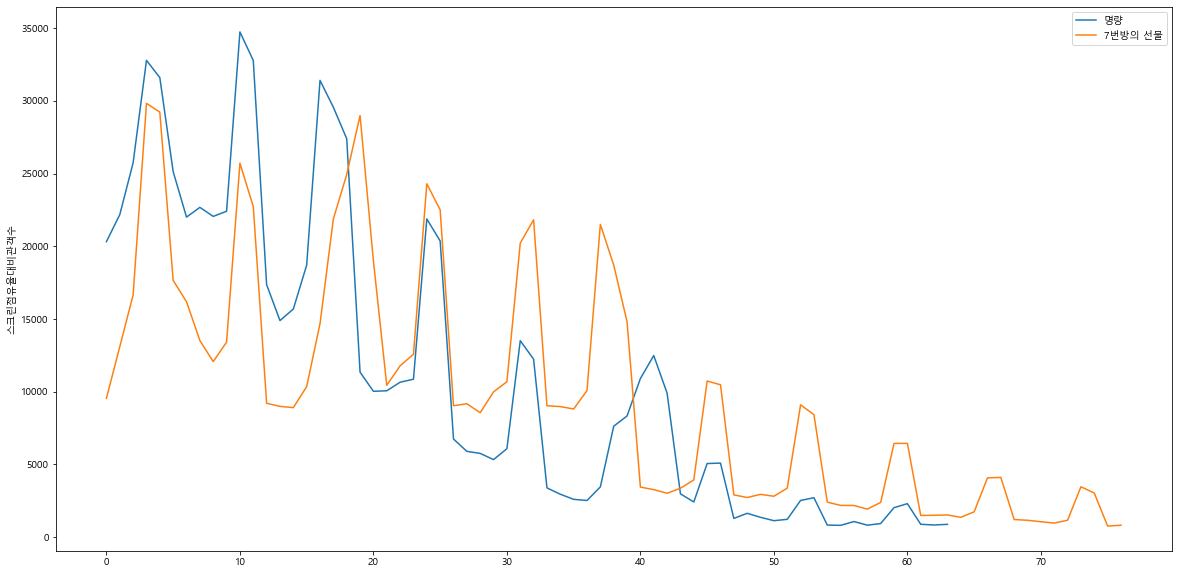

In [25]:
lineplotting("스크린점유율대비관객수")

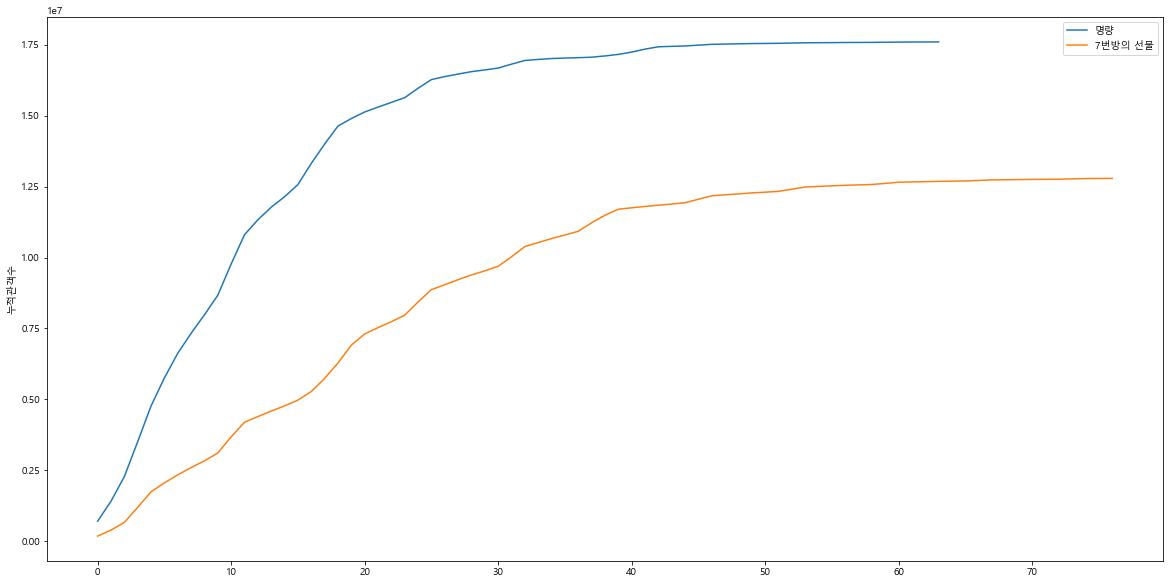

In [26]:
lineplotting("누적관객수")

In [27]:
mr["최대누적관객수비율"] = 0
m7["최대누적관객수비율"] = 0
mr.loc[:,"최대누적관객수비율"] = mr.loc[:,"누적관객수"] / mr.loc[:,"누적관객수"].max()
m7.loc[:,"최대누적관객수비율"] = m7.loc[:,"누적관객수"] / m7.loc[:,"누적관객수"].max()

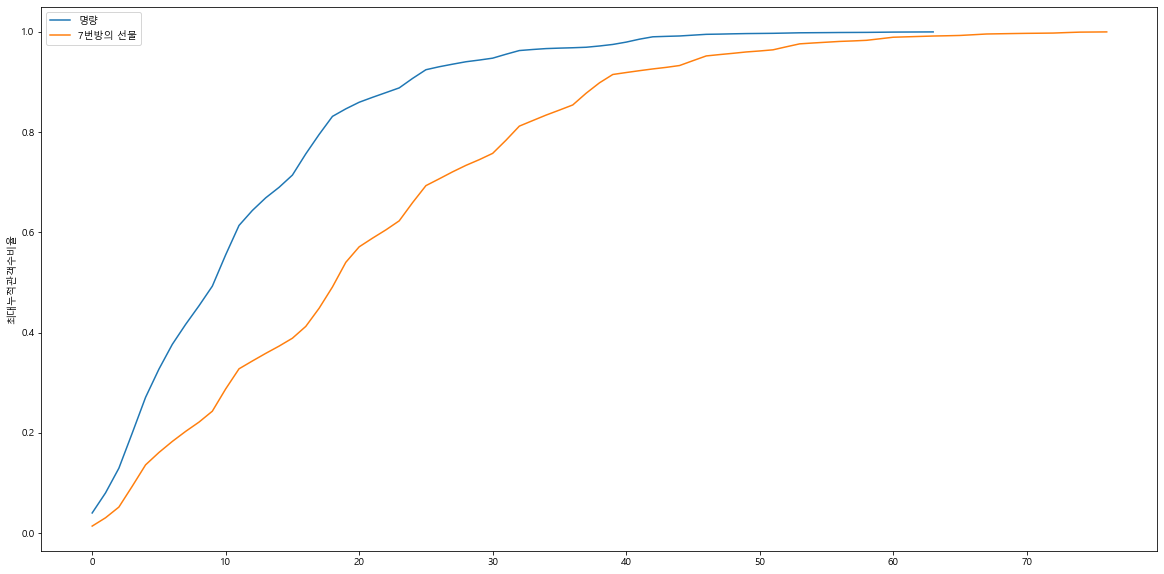

In [28]:
lineplotting("최대누적관객수비율")

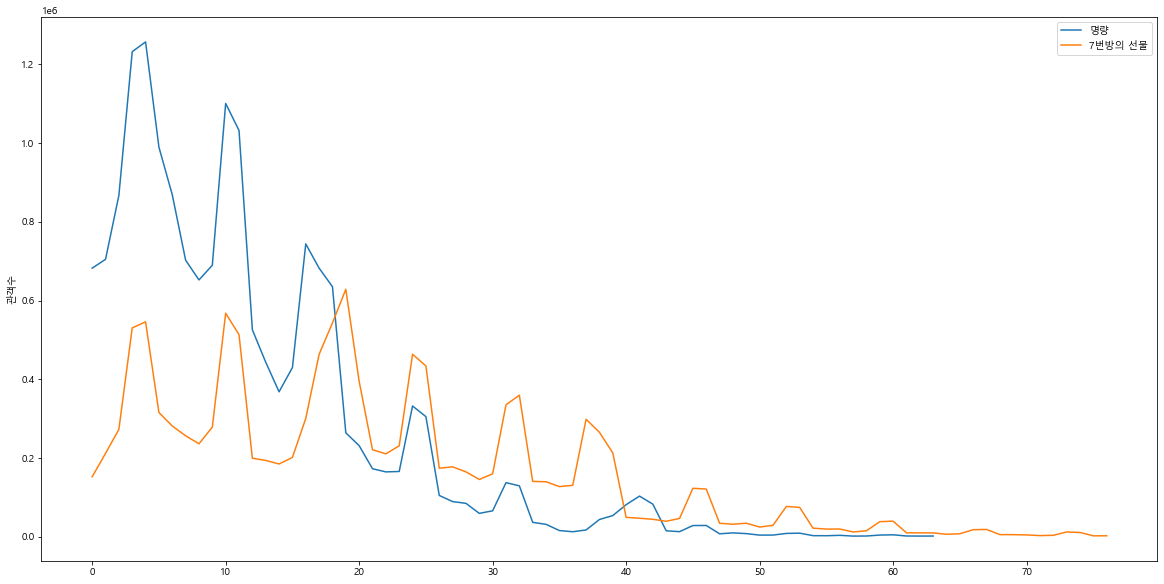

In [29]:
lineplotting("관객수")

In [30]:
# 요일 컬럼 추가
# 0~6의 값을 가지며 월~일까지의 요일을 의미한다
mr["요일"] = 0
m7["요일"] = 0

for i in range(len(mr)):
    mr.loc[i, "요일"] = date(int(mr.loc[i,"날짜"].year),int(mr.loc[i,"날짜"].month),int(mr.loc[i,"날짜"].day)).weekday()

for i in range(len(m7)):
    m7.loc[i, "요일"] = date(int(m7.loc[i,"날짜"].year),int(m7.loc[i,"날짜"].month),int(m7.loc[i,"날짜"].day)).weekday()


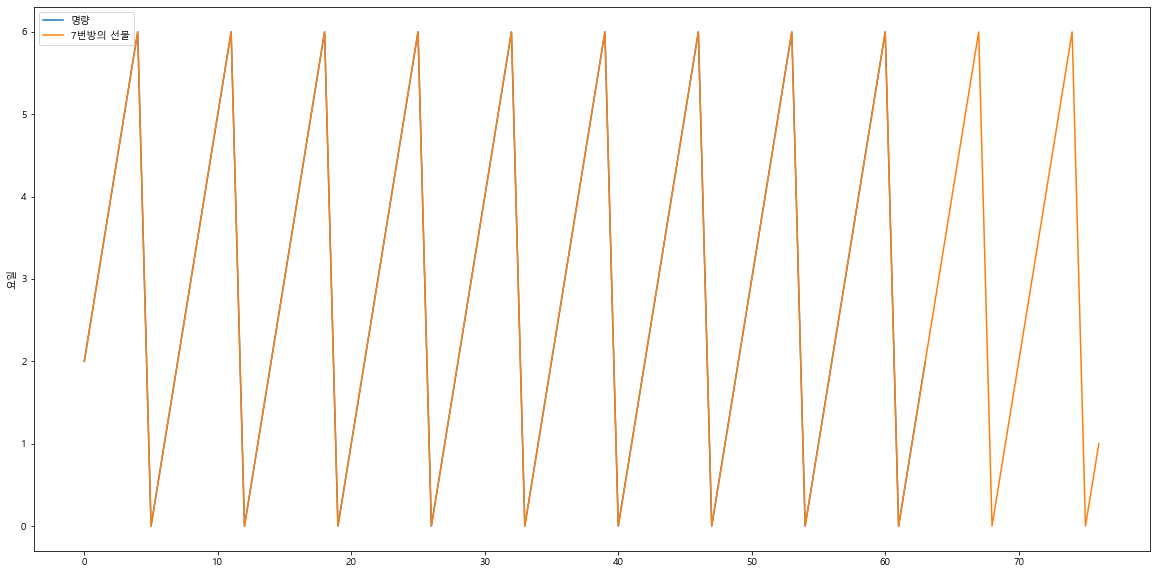

In [31]:
lineplotting("요일")

#### 일주일간의 평균 값을 통해 경향성을 파악해보기

In [32]:
mr2 = mr.drop(["날짜", "순위", "최대누적관객수비율", "요일"], axis=1)
m72 = m7.drop(["날짜", "순위", "최대누적관객수비율", "요일"], axis=1)

In [33]:
mr_mean = pd.DataFrame(columns=mr2.columns)
m7_mean = pd.DataFrame(columns=m72.columns)

for i in range(len(mr) // 7 + 1):
    mr_mean.loc[i] = mr2.loc[7*i:(7*i + 6),:].mean()

for i in range(len(m7) // 7):
    m7_mean.loc[i] = m72.loc[7*i:(7*i + 6),:].mean()

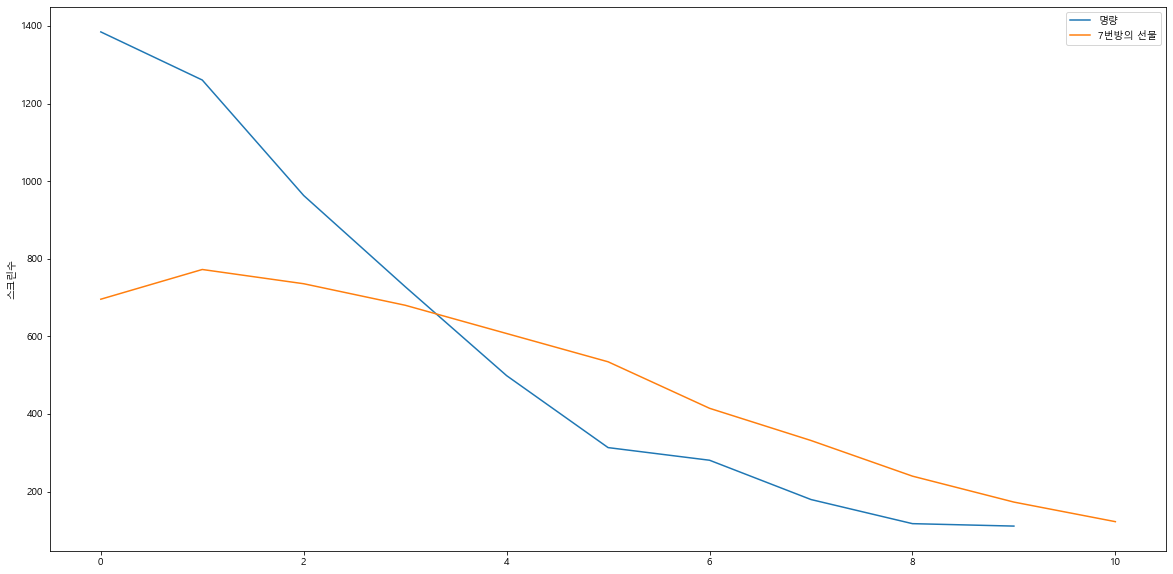

In [34]:
lineplotting("스크린수", df1=mr_mean, df2 = m7_mean)

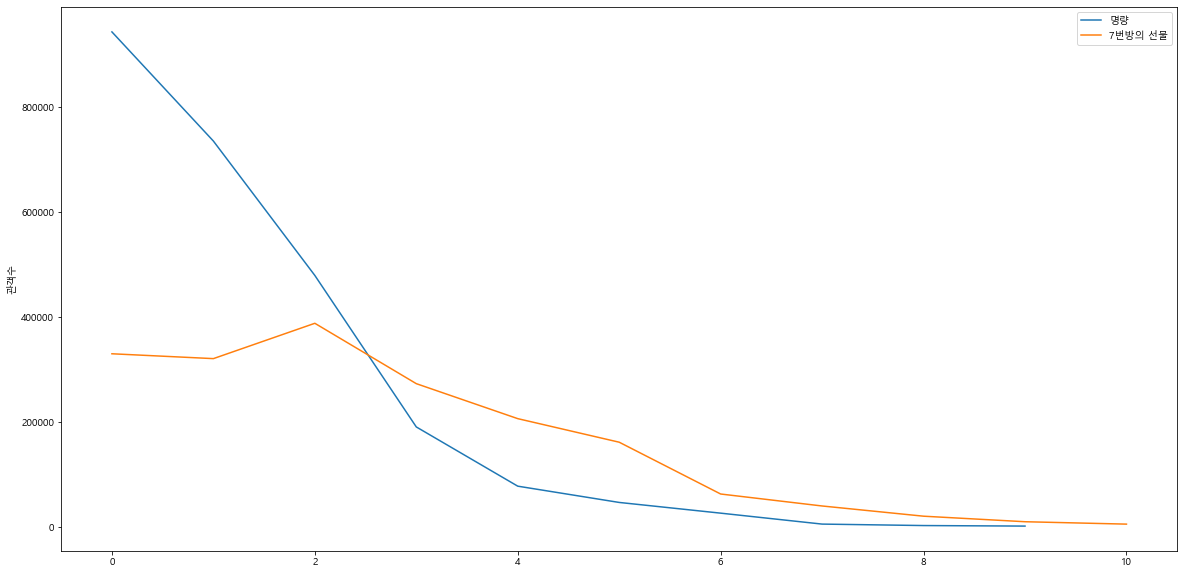

In [35]:
lineplotting("관객수", df1=mr_mean, df2=m7_mean)

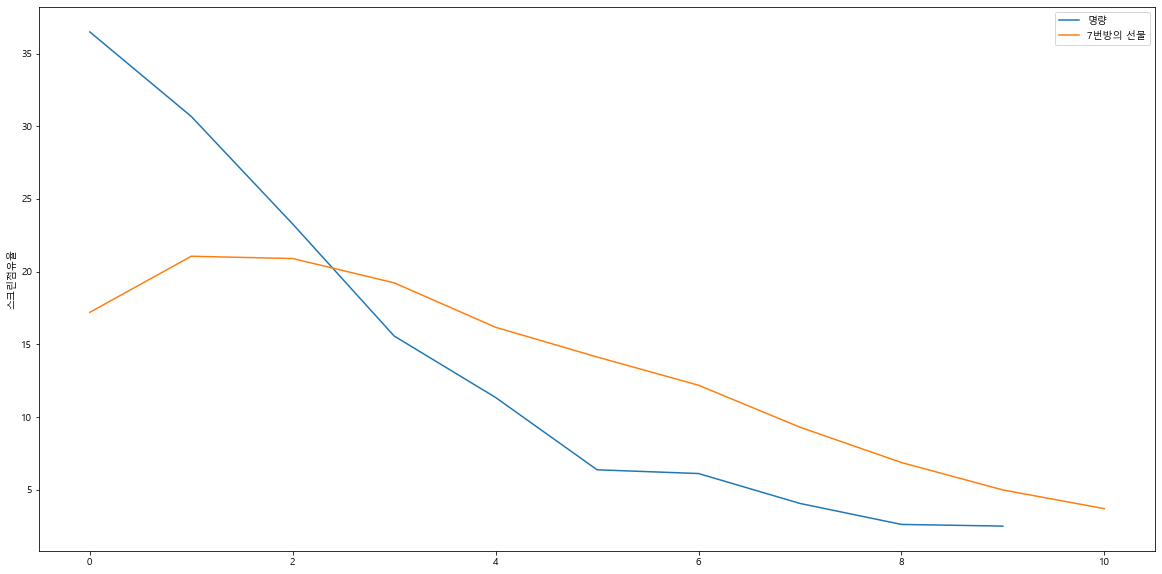

In [36]:
lineplotting("스크린점유율", df1=mr_mean, df2=m7_mean)